Test Spatial correlation results for MMP "macro" parcels

In [2]:
%load_ext autoreload
%autoreload 2

In [22]:
from pathlib import Path
import numpy as np
import pandas as pd
import mni_utils as uti
import matplotlib.pyplot as plt
from mni_plots import plot_corr_tau_sc

In [32]:
###
# Paths and parameters
###

base_path = Path("F:\\iEEG_neural_dynamics\\MNIOpen")
res_dir = "Results_SC"
res_path = base_path.joinpath(res_dir)
dist_bins = np.arange(0, 101, 5)  # bins to use as distances
fit_bins = False

In [28]:
###
# Import data
###

# Load the data
# Spatial correlations
df_sc_stages = {
    stage: pd.read_csv(res_path.joinpath(f"SC_{stage}.csv"), index_col=0)
    for stage in ["W", "N3", "R"]
}
# Temporal correlations
df_tau_stages = {
    stage: pd.read_csv(base_path.joinpath("Results", f"tau_macro_mmp_{stage}.csv"), index_col=0)
    for stage in ["W", "N3", "R"]
}

# Load macro parcels
mmp_macro = pd.read_csv(base_path.joinpath("mmp_macro.csv"), index_col=0, names=["parcel", "macro_region", "macro_labels"])
mmp_macro.set_index("parcel", inplace=True)

# Add macro parcels to the data
for stage in ["W", "N3", "R"]:
    df_sc_stages[stage].insert(8, "mmp_macro_1", df_sc_stages[stage]["mmp_1"].map(mmp_macro["macro_labels"]))
    df_sc_stages[stage].insert(9, "mmp_macro_2", df_sc_stages[stage]["mmp_2"].map(mmp_macro["macro_labels"]))


 Fit data:

In [33]:
df_params_stages = {}
for stage in ["W", "N3", "R"]:
    df_params = []
    for reg in df_sc_stages[stage]["mmp_macro_1"].unique():
        df_sc_reg = df_sc_stages[stage][
            (df_sc_stages[stage]["mmp_macro_1"] == reg)
            | (df_sc_stages[stage]["mmp_macro_2"] == reg)
        ]
        if fit_bins:
            df_sc_bin_reg = uti.compute_sc_bin(df_sc_reg, bins=dist_bins)
            popt, pcov = uti.fit_sc_bins(df_sc_bin_reg)
        else:
            popt, pcov = uti.fit_sc(df_sc_reg)
        df_params.append(
            pd.DataFrame(popt.reshape(1, -1), columns=["k", "a", "b"], index=[reg])
        )
    df_params = pd.concat(df_params)
    df_params_stages[stage] = df_params

Correlate with temporal parameters:

Stage: W, Param: k
Linregress results: r = -0.26849877209910455, p = 0.23925991092125506
Spearman results: r = -0.5324675324675324, p = 0.01295751978995037
Stage: W, Param: a
Linregress results: r = -0.0896167352089205, p = 0.6992690464433391
Spearman results: r = 0.01038961038961039, p = 0.9643490145476254
Stage: W, Param: b
Linregress results: r = 0.0832831153280891, p = 0.7196654533496054
Spearman results: r = 0.14025974025974028, p = 0.5442470998307318


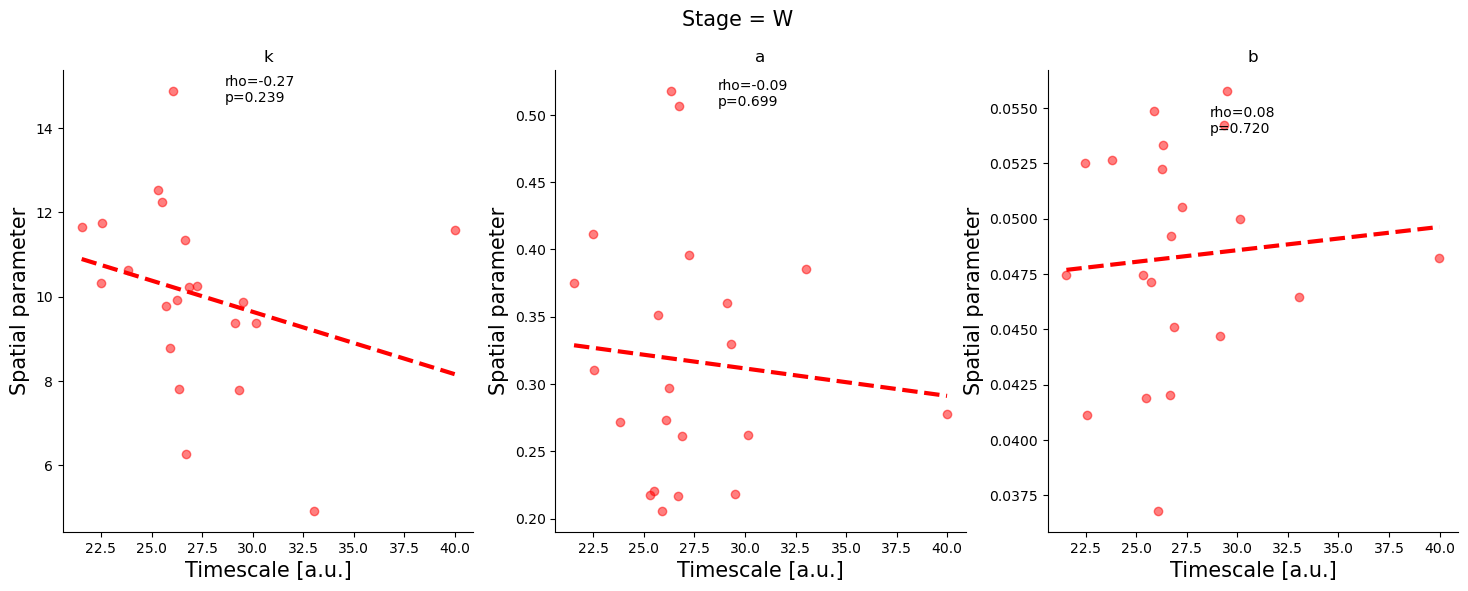

Stage: N3, Param: k
Linregress results: r = -0.26053563794068085, p = 0.2540142082873723
Spearman results: r = -0.17922077922077922, p = 0.43696527489850645
Stage: N3, Param: a
Linregress results: r = 0.032005998977485677, p = 0.8904589124913965
Spearman results: r = -0.051948051948051945, p = 0.8230456679720456
Stage: N3, Param: b
Linregress results: r = 0.47649964481319546, p = 0.028975870253488575
Spearman results: r = 0.2987012987012987, p = 0.1884184241053723


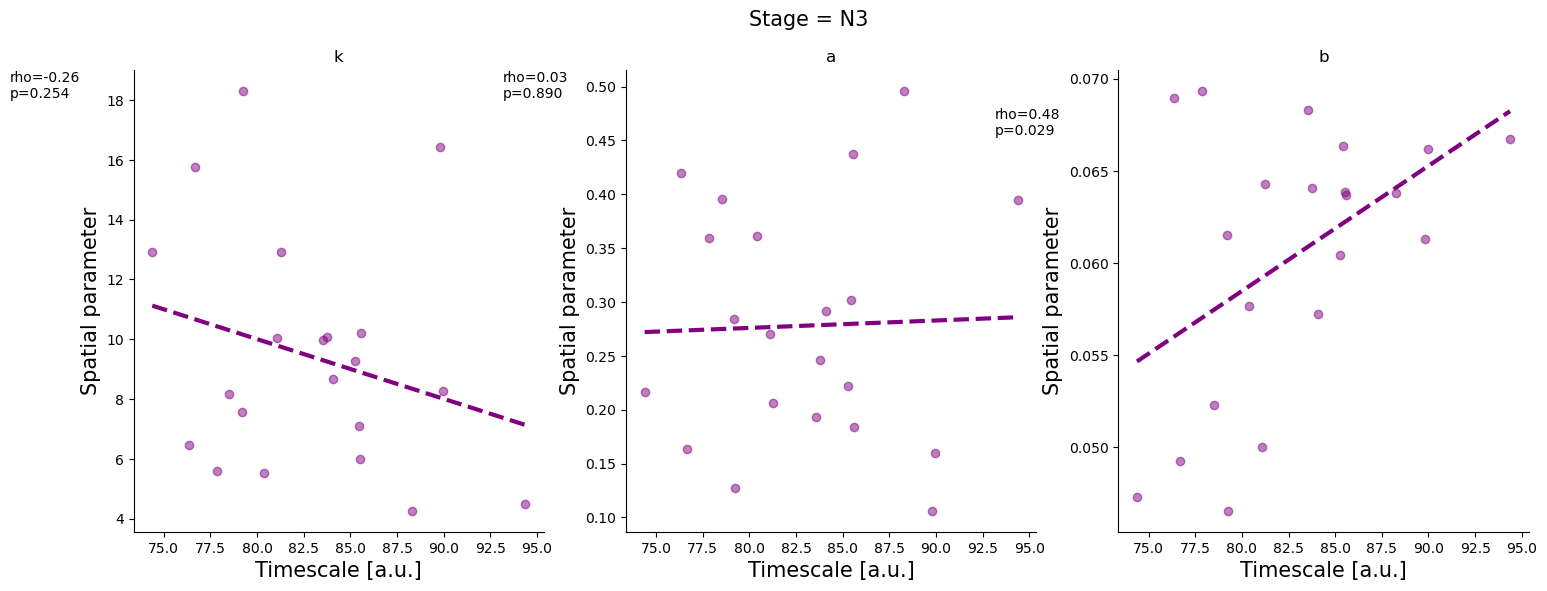

Stage: R, Param: k
Linregress results: r = 0.27152903394229, p = 0.23379438649591353
Spearman results: r = 0.0987012987012987, p = 0.6703614184969642
Stage: R, Param: a
Linregress results: r = -0.03311517969915537, p = 0.8866858738577713
Spearman results: r = 0.08311688311688312, p = 0.7202033241160488
Stage: R, Param: b
Linregress results: r = -0.5122125702866481, p = 0.017600514679348683
Spearman results: r = -0.46623376623376617, p = 0.03314052796877135


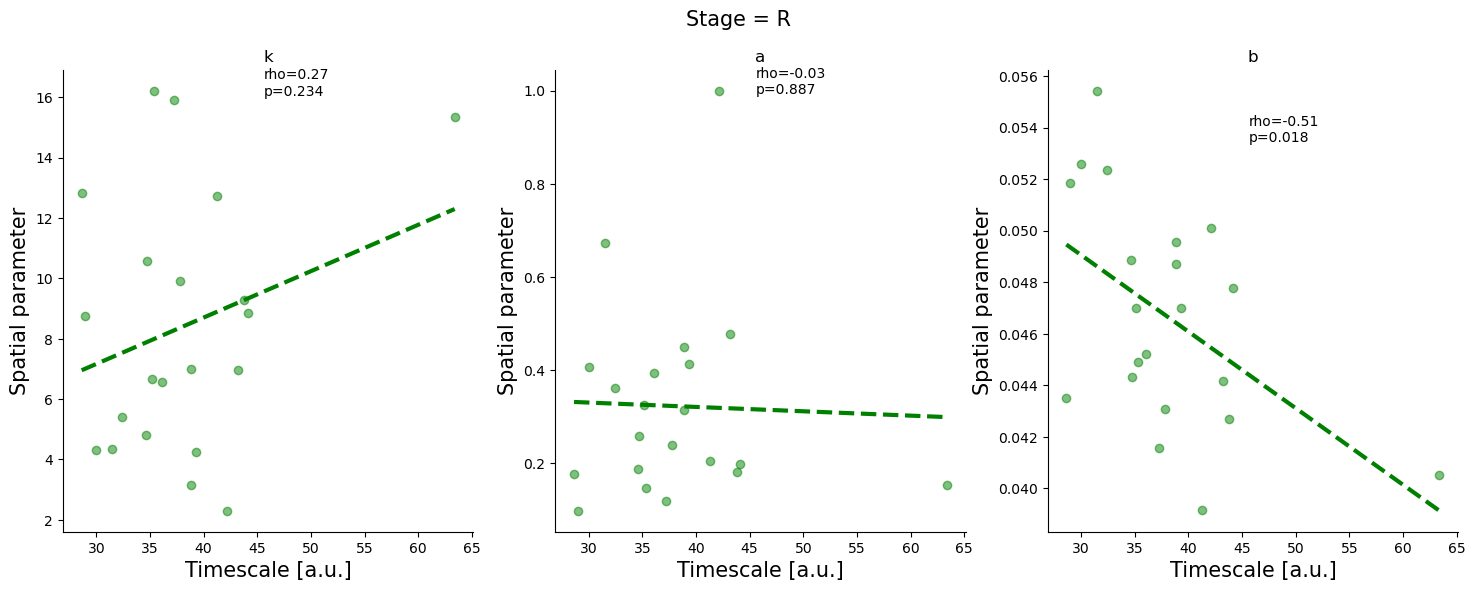

In [34]:
colors_stage = {"W": "r", "N3": "purple", "R": "g"}

for stage in ["W", "N3", "R"]:

    # Define figure
    fig, axs = plt.subplots(1, 3, figsize=[18, 6])
    fig.suptitle(f"Stage = {stage}", fontsize=15)

    # Plot one subplot per parameter
    for i, param in enumerate(["k", "a", "b"]):

        df_temp = df_tau_stages[stage]["mean"].copy()
        df_spa = df_params_stages[stage][param].astype(float)
        print(f"Stage: {stage}, Param: {param}")
        axs[i] = plot_corr_tau_sc(
            axs[i], df_temp, df_spa, title=param, color=colors_stage[stage]
        )

    plt.show()

Conclusion: same relationships as with using the MNI labels, just less strong correlations. Probably the even lower number of parcels here is not enough to have the granularity to capture the relationships.